In [20]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# Load in the dataset from Sklearn
from sklearn.datasets import load_breast_cancer

In [0]:
# Load the data
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [0]:
# Buch is like dictionary, keys act as attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
type(data.data)

numpy.ndarray

In [0]:
data.data.shape

(569, 30)

In [0]:
data.target.shape

(569,)

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
#split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = X_train.shape

In [0]:
# scale the data to 0-1 so that sigmoid can work (model)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1,activation="sigmoid")                              
])
model.compile(optimizer="adam",
  loss="binary_crossentropy",
  metrics=["accuracy"])

In [0]:
# Train the model
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 2ms/sample - loss: 0.8863 - accuracy: 0.4462 - val_loss: 0.8552 - val_accuracy: 0.4734
Epoch 2/100
381/381 [==============================] - 0s 96us/sample - loss: 0.8070 - accuracy: 0.5249 - val_loss: 0.7814 - val_accuracy: 0.5638
Epoch 3/100
381/381 [==============================] - 0s 98us/sample - loss: 0.7394 - accuracy: 0.5801 - val_loss: 0.7164 - val_accuracy: 0.6383
Epoch 4/100
381/381 [==============================] - 0s 98us/sample - loss: 0.6786 - accuracy: 0.6404 - val_loss: 0.6615 - val_accuracy: 0.6968
Epoch 5/100
381/381 [==============================] - 0s 95us/sample - loss: 0.6259 - accuracy: 0.6929 - val_loss: 0.6143 - val_accuracy: 0.7606
Epoch 6/100
381/381 [==============================] - 0s 109us/sample - loss: 0.5801 - accuracy: 0.7218 - val_loss: 0.5747 - val_accuracy: 0.7819
Epoch 7/100
381/381 [==============================] - 0s 97us/sample - loss: 

In [0]:
# Evaluate the model . evaluate() returns loss and accuracy
print("Train score: ",model.evaluate(X_train,y_train))
print("Test score: ",model.evaluate(X_test,y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

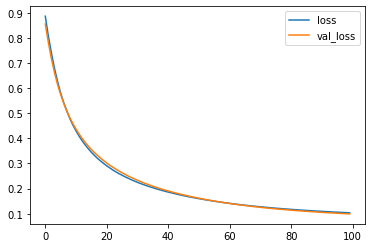

In [0]:
# Plot what was returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()

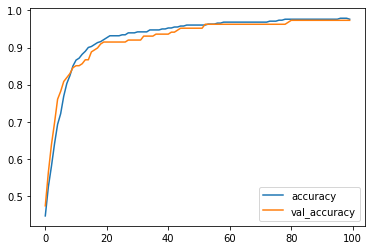

In [0]:
# Plot the accuracy during fit()
plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label="val_accuracy")
plt.legend()

# Making Predictions



In [0]:
# Make Predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpretted as probabilities (py=1|x)

[[9.7539294e-01]
 [9.7355688e-01]
 [9.9058366e-01]
 [9.9789190e-01]
 [6.2450767e-04]
 [6.3261390e-04]
 [9.7584295e-01]
 [2.1445751e-03]
 [1.4606893e-01]
 [2.9852986e-04]
 [4.1395426e-05]
 [6.7104447e-01]
 [9.2102420e-01]
 [9.7039324e-01]
 [9.8214912e-01]
 [9.8263890e-01]
 [5.6844503e-02]
 [8.7701970e-01]
 [6.5008903e-01]
 [3.3431208e-01]
 [9.6205950e-01]
 [9.6764064e-01]
 [9.8961097e-01]
 [9.9530554e-01]
 [6.5057415e-01]
 [3.0762666e-01]
 [8.6243951e-01]
 [1.0257602e-02]
 [7.6828444e-01]
 [9.9637723e-01]
 [3.4576094e-01]
 [9.6517956e-01]
 [9.2622358e-01]
 [9.9161267e-01]
 [2.9040277e-03]
 [3.2782555e-07]
 [6.7861497e-01]
 [9.5621920e-01]
 [9.6896839e-01]
 [9.7155571e-06]
 [9.8216045e-01]
 [2.3885220e-02]
 [9.7786605e-01]
 [3.0368567e-05]
 [5.9306622e-06]
 [6.4708024e-01]
 [9.3301463e-01]
 [2.8669238e-03]
 [9.0049839e-01]
 [1.4468431e-03]
 [9.8026568e-01]
 [9.8937047e-01]
 [9.2953444e-05]
 [9.9903995e-01]
 [8.7300736e-01]
 [9.7616470e-01]
 [9.9899530e-01]
 [9.6845806e-01]
 [9.9650145e-0

In [0]:
# Round to get the actual Predictions
# Note! has to be flattened since the targtets are size(N,) while the predictions ar3e size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
# Calculate the accuracy, compare it to evaluate() output
print('Manuallty calculated accuracy:', np.mean(P==y_test))
print('Evaluate output:', model.evaluate(X_test, y_test))

Manuallty calculated accuracy: 0.973404255319149
188/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Part3: Saving and Loading the Model

In [0]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [24]:
# check that the model exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Dec 14 15:49 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Dec 12 16:48 sample_data


In [25]:
# Let's load the model and confirm that it still works
# note! there is a bug in Keras where load/save only works if you DONT use the Input() layer explicitly
# make sure you define the model with only Dense(1, Input_shape=(D,))
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test,y_test)

188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09917843975919358, 0.9734042]

In [0]:
# Download the file - requires Google Chrome
from google.colab import files
files.download('linearclassifier.h5')